In [1]:
#import libraries and set display
import numpy as np
import pandas as pd

pd.set_option("display.precision",2)

#import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#show graphs in Jupyter notebook and show them more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
#read in the titanic dataset
df = pd.read_csv("disaster.csv")

In [3]:
#show the top 5 rows of the dataset
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.34,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.55,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# check the size of the dataset-how many rows and column
print(df.shape)

#check the column names
print(df.columns)

#Result: 1309 rows and 14 columns

(1309, 14)
Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


In [5]:
#get some info about the dataframe
print(df.info())

#Result : if any row value is less than the total row number (1309)-then there are blank values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [6]:
#change data type of the pclass column to category
df["pclass"] = df["pclass"].astype("category")

In [7]:
#give summary statistics for numerical columns
df.describe()

,survived,age,sibsp,parch,fare,body
count,1309.00,1046.00,1309.00,1309.00,1308.00,121.00
mean,0.38,29.88,0.50,0.39,33.30,160.81
std,0.49,14.41,1.04,0.87,51.76,97.70
min,0.00,0.17,0.00,0.00,0.00,1.00
25%,0.00,21.00,0.00,0.00,7.90,72.00
50%,0.00,28.00,0.00,0.00,14.45,155.00
75%,1.00,39.00,1.00,0.00,31.27,256.00
max,1.00,80.00,8.00,9.00,512.33,328.00


In [8]:
#give summary statistics for non numerical values
df.describe(include=["object", "bool","category"])

,pclass,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,1309,295,1307,486,745
unique,3,1307,2,929,186,3,27,369
top,3,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,709,2,843,11,6,914,39,64


In [9]:
#check if datatype was updated correctly
print(df.info())

#result: update of plcass dtype done successfully

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   category
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(1), float64(3), int64(3), object(7)
memory usage: 134.5+ KB
None


In [10]:
#use the value_counts method on the boolean columnsurvived
df["survived"].value_counts()

#result: only 500 out of 1309 passengers survived

0    809
1    500
Name: survived, dtype: int64

In [11]:
#Get proportion of survival
df["survived"].value_counts(normalize=True)

#result: shows 38% of passengers survived so low survival rate

0    0.62
1    0.38
Name: survived, dtype: float64

In [12]:
#get count of the sex column
df["sex"].value_counts()

#result: there were more males onboard than females

male      843
female    466
Name: sex, dtype: int64

In [13]:
#get proportion male to female
df["sex"].value_counts(normalize=True)

#result: 64% of the passengers were male

male      0.64
female    0.36
Name: sex, dtype: float64

In [14]:
#get count of the pclass column
df["pclass"].value_counts()

#result: the majority of the passengers were in 3rd class

3    709
1    323
2    277
Name: pclass, dtype: int64

In [15]:
#get the proportion of each passenger class
df["pclass"].value_counts(normalize=True)

#result: 54% of the passengers were in 3rd class

3    0.54
1    0.25
2    0.21
Name: pclass, dtype: float64

In [16]:
#sort by the values in the fare column
df.sort_values(by="fare", ascending=False).head()

#result: the highest fare was 512.33

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.33,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.33,NaN,C,3,NaN,NaN
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.33,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.33,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
113,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S,10,NaN,"Winnipeg, MB"


In [17]:
#get the average age of the passengers
df["age"].mean()

#result: the average age of passengers was 29

29.8811345124283

In [18]:
#use boolean indexing to find the average values of numerical values for passengers who survived
df[df["survived"] == 1].mean()

#result: the average age of passengers who survived was 28

survived     1.00
age         28.92
sibsp        0.46
parch        0.48
fare        49.36
body          NaN
dtype: float64

In [19]:
#check the average numerical values for passengers who survived
df[df["survived"] == 0].mean()

#result: indicates that older passengers and passengers who paid a lower fare were less likely to survive

survived      0.00
age          30.55
sibsp         0.52
parch         0.33
fare         23.35
body        160.81
dtype: float64

In [20]:
#getting the slice of data between rows with index 0 to 5 and the columns from survived to sex
df.loc[0:5, "survived":"sex"]

,survived,name,sex
0,1,"Allen, Miss. Elisabeth Walton",female
1,1,"Allison, Master. Hudson Trevor",male
2,0,"Allison, Miss. Helen Loraine",female
3,0,"Allison, Mr. Hudson Joshua Creighton",male
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female
5,1,"Anderson, Mr. Harry",male


In [21]:
#use slice command to get the last row in the dataframe
df[-1:]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.88,NaN,S,NaN,NaN,NaN


In [22]:
#grouping and getting summary statistics for the age and fare columns for each survival group
columns_to_show = ["age","fare"]
df.groupby(["survived"])[columns_to_show].describe(percentiles=[])

age                                   fare                     \
          count   mean    std   min   50%   max  count   mean    std  min   
survived                                                                    
0         619.0  30.55  13.92  0.33  28.0  74.0  808.0  23.35  34.15  0.0   
1         427.0  28.92  15.06  0.17  28.0  80.0  500.0  49.36  68.65  0.0   

                        
           50%     max  
survived                
0         10.5  263.00  
1         26.0  512.33

In [23]:
#build contingency table with pclass and survived variables
pd.crosstab(df["survived"],df["pclass"])

pclass,1,2,3
survived,,,
0,123,158,528
1,200,119,181


In [24]:
#same as above but proportions instead of counts
pd.crosstab(df["survived"],df["pclass"],normalize=True)

#result: pclass 3 had the lowest survival rate and pclass 1 had highest survival rate

pclass,1,2,3
survived,,,
0,0.09,0.12,0.40
1,0.15,0.09,0.14


In [25]:
#using pivot tables in pandas to show average age and fare by pclass
df.pivot_table(
    ["age", "fare"],["pclass"],
    aggfunc = "mean"
)

,age,fare
pclass,,
1,39.16,87.51
2,29.51,21.18
3,24.82,13.30


In [26]:
#delete the boat column, set inplace =true to remove it from original dataframe
df.drop(["boat"], axis =1, inplace=True)

In [27]:
#create column to label passengers aged under 18 as a child
df["child"] = (df["age"]<18).astype("int")

In [28]:
#set up analysis to check if pclass is related to survival, set margins to true to show totals
pd.crosstab(df["survived"], df["pclass"],margins=True)

pclass,1,2,3,All
survived,,,,
0,123,158,528,809
1,200,119,181,500
All,323,277,709,1309


<AxesSubplot:xlabel='pclass', ylabel='count'>

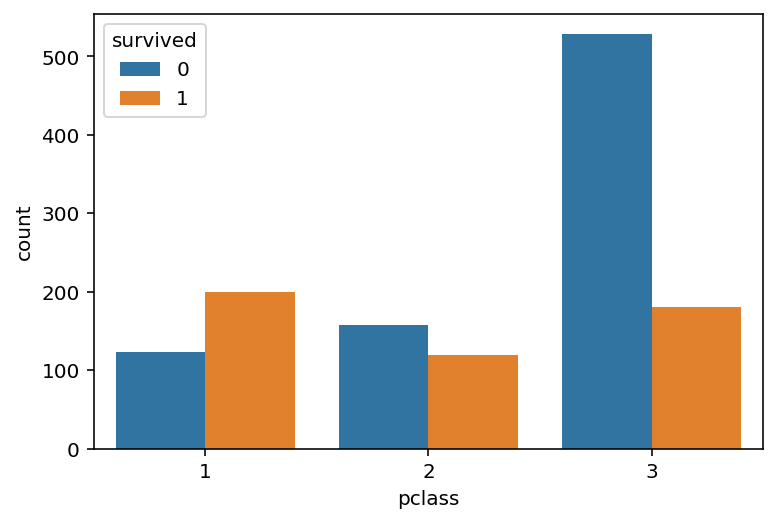

In [29]:
#create a bar plot to visualize the count of survival broken down by passenger class
sns.countplot(x="pclass", hue="survived",data=df)

#result: pclass 3 has lowest survival rate and pclass 1 has highest survival

In [30]:
#look at gender and survival in crosstab
pd.crosstab(df["survived"], df["sex"],margins=True)

sex,female,male,All
survived,,,
0,127,682,809
1,339,161,500
All,466,843,1309


<AxesSubplot:xlabel='sex', ylabel='count'>

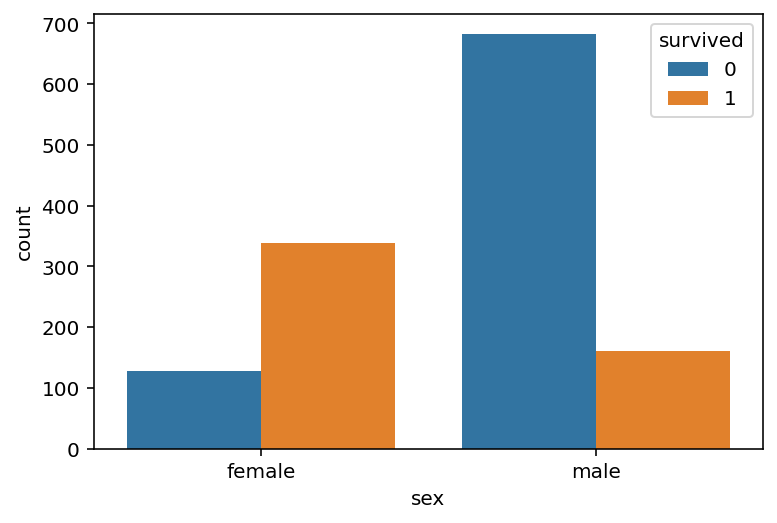

In [31]:
#create a bar plot to visualize the count of survival broken down by gender
sns.countplot(x="sex", hue="survived",data=df)

#result: females had a higher survival rate than males